In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
#import torch.cuda
import random
from itertools import chain as chain
from torch.distributions.multivariate_normal import MultivariateNormal

#conda activate base
cudaOn = False

In [2]:
#Data preparation

In [3]:
tepLoc = "C:/Users/Charlie/Desktop/TEP_Data/"

#tepTrain = tepLoc + "TEP_Faulty_Training.csv"
tepTrain = tepLoc + "TEP_FaultFree_Training.csv"

#tepTest = tepLoc + "TEP_FaultFree_Testing.csv"
tepTest = tepLoc + "TEP_Faulty_Testing.csv"

scaler = MinMaxScaler()

#data = pd.read_csv('c172_file_1.csv')
data = pd.read_csv(tepTrain)
dataTest = pd.read_csv(tepTest)



In [4]:
#lookie = dataTest[dataTest['simulationRun']==112]
#print(lookie[lookie['faultNumber']==5])

In [5]:
data = data.drop('Unnamed: 0',axis=1)
data = data.drop('faultNumber',axis=1)
data = data.drop('simulationRun',axis=1)
data = data.drop('sample',axis=1)
data

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,75.533,120.41,0.34050,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,75.935,120.39,0.35374,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,74.706,120.41,0.35910,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,75.101,120.39,0.32469,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


In [6]:
dataTest = dataTest[dataTest['simulationRun']==267]
faultNumbersT = dataTest.get('faultNumber')
#
dataTest = dataTest.drop('Unnamed: 0',axis=1)
dataTest = dataTest.drop('faultNumber',axis=1)
dataTest = dataTest.drop('simulationRun',axis=1)
dataTest = dataTest.drop('sample',axis=1)

#dataTest = dataTest.iloc(0)[0:19500] #test A and B
#dataTest = dataTest.iloc(0)[19500:38500] #test C and D
#dataTest = dataTest.iloc(0)[39000:58000]

faultNumbersTest = []
for i in faultNumbersT:
    faultNumbersTest.append(i)

data = data.astype('float64')
dataTest = dataTest.astype('float64')

In [7]:
for i in range(int(len(faultNumbersTest)/500)):
    print(str(i*500) + ": " + str(faultNumbersTest[i*500]))
#print(faultNumbersTest[10000:10100])

0: 1
500: 1
1000: 2
1500: 2
2000: 3
2500: 3
3000: 4
3500: 4
4000: 5
4500: 5
5000: 6
5500: 6
6000: 7
6500: 7
7000: 8
7500: 8
8000: 9
8500: 9
9000: 10
9500: 10
10000: 11
10500: 11
11000: 12
11500: 12
12000: 13
12500: 14
13000: 14
13500: 15
14000: 15
14500: 16
15000: 16
15500: 17
16000: 17
16500: 18
17000: 18
17500: 19
18000: 19
18500: 20


In [8]:
print(dataTest)
numVariables = 52

         xmeas_1  xmeas_2  xmeas_3  xmeas_4  xmeas_5  xmeas_6  xmeas_7  \
5107200  0.24990   3659.0   4569.4   9.1423   27.269   42.332   2705.5   
5107201  0.24905   3696.0   4511.6   9.3578   26.994   42.756   2705.8   
5107202  0.24970   3675.3   4534.9   9.3027   26.713   42.657   2706.2   
5107203  0.25076   3672.0   4518.4   9.3712   26.474   42.147   2705.2   
5107204  0.26070   3652.8   4532.5   9.3986   26.880   42.717   2703.0   
...          ...      ...      ...      ...      ...      ...      ...   
5126395  0.27364   3690.3   4549.2   9.3740   26.960   42.452   2717.9   
5126396  0.23779   3630.2   4548.2   9.3930   27.048   41.847   2717.9   
5126397  0.23785   3639.8   4529.1   9.2802   26.497   42.488   2716.3   
5126398  0.24421   3680.4   4500.8   9.2728   26.940   42.327   2716.9   
5126399  0.24332   3684.3   4556.6   9.3251   26.947   42.318   2716.7   

         xmeas_8  xmeas_9  xmeas_10  ...   xmv_2   xmv_3   xmv_4   xmv_5  \
5107200   75.734   120.41   0.33742

In [9]:
#Helper Methods

In [10]:
#Split and reshape the data set by step_size , use min-max or stanrdardlize method to rescale the data
def Splitting_dataset(data, step_size, scale=True, scaler_type=MinMaxScaler):
        l = len(data) 
        data = scaler_type().fit_transform(data)
        Xs = []
        Ys = []
        for i in range(0, (len(data) - step_size)):
            Xs.append(data[i:i+step_size])
            Ys.append(data[i:i+step_size])
        train_x, test_x, train_y, test_y = [np.array(x) for x in train_test_split(Xs, Ys)]
        assert train_x.shape[2] == test_x.shape[2] == (data.shape[1] if (type(data) == np.ndarray) else len(data))
        return  (train_x.shape[2], train_x, train_y, test_x, test_y)
    
def get_batch(x, batch_size):
    """Made with taking test_x or XX as input"""
    t = 0
    while t >= 0:
        x_mod = len(x) % batch_size
        start = random.random() * (len(x)-x_mod)
        start = int(start)
        if start + batch_size < len(x):
            t = t-1
    batch = x[start:(start+batch_size)]
    #print(batch.shape)
    return batch

def to_var(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)

def loss_fn(recon_x, x, mu, logvar):
        BCE = F.binary_cross_entropy(recon_x, x, size_average=False)
    
        # see Appendix B from VAE paper:
        # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
        # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
        KLD = -0.5 * torch.sum(1 + logvar - mu**2 -  logvar.exp())
        return BCE + KLD
    
def tep_testing_stepped(dat,step_size):
    res = []
    ind = 0
    scale = MinMaxScaler().fit(dat)
    dat = pd.DataFrame(scale.transform(dat))
    #print(int((len(data)/step_size)))
    for i in range(int((len(dat)/step_size))):
        if ind + step_size < len(dat):
            step = []
            for j in range(step_size):
              #print(data.iloc(0)[ind])#[ind])
              step.append(dat.iloc(0)[ind])
              ind = ind + 1
            res.append(step)
    return res

In [11]:
#Model

In [12]:
class VAE(nn.Module):
    def __init__(self, image_size=784, h_dim=27, z_dim=31, n_flow_steps=1):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(image_size, h_dim),
            nn.LeakyReLU(0.1),
            nn.Linear(h_dim, z_dim*2) #is it saying its getting a mu and a var for each z dim out?
            
            #how can I represent the encoder as a distribution acting as the prior?
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, image_size),
            nn.Sigmoid()
        )
    
    def reparameterize(self, mu, logvar):
        std = logvar.mul(0.5).exp_() 
        esp = to_var(torch.randn(*mu.size()))
        z = mu + std * esp
        return z
    
    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = torch.chunk(h, 2, dim=1)
        #print(mu.shape)
        #print(logvar.shape)
        z = self.reparameterize(mu, logvar)
        #print(z.shape)
        #z = z.float()
        z = model(z)
        #print(z)
        tensorZ = z[0]#torch.tensor(z[0])
        #print(tensorZ.shape)
        #print(z[0])
        return self.decoder(tensorZ), mu, logvar
    

class stacked_NVP(nn.Module):
    def __init__(self, d, k, hidden, n):
        super().__init__()
        self.bijectors = nn.ModuleList([
            R_NVP(d, k, hidden=hidden) for _ in range(n)
        ])
        self.flips = [True if i%2 else False for i in range(n)]
        
    def forward(self, x):
        log_jacobs = []

        for bijector, f in zip(self.bijectors, self.flips):
            x, log_pz, lj = bijector(x, flip=f)
            log_jacobs.append(lj)
        
        return x, log_pz, sum(log_jacobs)
    
    def inverse(self, z):
        for bijector, f in zip(reversed(self.bijectors), reversed(self.flips)):
            z = bijector.inverse(z, flip=f)
        return z
    
class R_NVP(nn.Module):
    def __init__(self, d, k, hidden):
        super().__init__()
        self.d, self.k = d, k
        self.sig_net = nn.Sequential(
                    nn.Linear(k, hidden),
                    nn.LeakyReLU(),
                    nn.Linear(hidden, d - k))

        self.mu_net = nn.Sequential(
                    nn.Linear(k, hidden),
                    nn.LeakyReLU(),
                    nn.Linear(hidden, d - k))

    def forward(self, x, flip=False):
        x1, x2 = x[:, :self.k], x[:, self.k:] 

        if flip:
            x2, x1 = x1, x2
        
        # forward
        sig = self.sig_net(x1)
        z1, z2 = x1, x2 * torch.exp(sig) + self.mu_net(x1)
        
        if flip:
            z2, z1 = z1, z2
        
        z_hat = torch.cat([z1, z2], dim=-1)

        log_pz = base_dist.log_prob(z_hat)
        log_jacob = sig.sum(-1)
        
        return z_hat, log_pz, log_jacob
    
    def inverse(self, Z, flip=False):
        z1, z2 = Z[:, :self.k], Z[:, self.k:] 
        
        if flip:
            z2, z1 = z1, z2
        
        x1 = z1
        x2 = (z2 - self.mu_net(z1)) * torch.exp(-self.sig_net(z1))
        
        if flip:
            x2, x1 = x1, x2
        return torch.cat([x1, x2], -1)

In [13]:
#Model Setup

In [14]:
step_size = 5
batch = 512
index_step_length = numVariables
epochs = 50

num = 3

d = 2
k = 1

base_mu, base_cov = torch.zeros(2), torch.eye(2)

base_mu = to_var(base_mu.double())
base_cov = to_var(base_cov.double())

base_dist = MultivariateNormal(base_mu, base_cov)
#---------------------------------------------------------------------------------------------------------------------------------
labels, X, Y, XX, YY = Splitting_dataset(data, step_size)
#XX.cuda()
demo = VAE(index_step_length,h_dim=36,z_dim=2)
model = stacked_NVP(d, k, hidden=512,n=num)
demo.double()
model.double()
    
#next set of tests should be with n=3, last set was with n=1
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
optimizer2 = torch.optim.RMSprop(demo.parameters(), lr=1e-3)

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.999)

if torch.cuda.is_available() & cudaOn:
    demo.cuda()
    print("demo done")
    model.cuda()
    print("model done")

In [15]:
#Model Training

In [16]:
idx = 0

anomaly_history = []
loss_history = []
avgSum = 0
avgCount = 0

for epoch in range(epochs):
    b = get_batch(X,batch)
    #print(range(batch))
    for i in range(batch):
        #localX = torch.tensor(b[i].cuda())
        localX = to_var(torch.tensor(b[i]))
        recon, mu, logvar = demo(localX)
        loss = loss_fn(recon, localX, mu, logvar) #doing kl-divergence loss correctly
        """This bound (kl loss) provides a unified objective function for 
        op-timization of both the parameters θ and φ of the model and variational approximation, respectively."""
        optimizer.zero_grad()
        optimizer2.zero_grad()
        loss.backward()
        optimizer.step()
        optimizer2.step()
        scheduler.step()
        idx = idx + 1

        avgSum = avgSum + torch.mean(loss/batch)
        avgCount = avgCount + 1
        anomaly_score = abs(torch.mean(localX-recon))

        if idx%30 == 0:
            loss_history.append(avgSum/avgCount)
            anomaly_history.append(anomaly_score)
            avgSum = 0
            avgCount = 0

        if idx%100 == 0:
            print("Epoch[{}/{}] Loss: {:.3f}".format(epoch+1, epochs, loss.data.item()/batch))

C:\Users\Charlie\anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch[1/50] Loss: 0.351
Epoch[1/50] Loss: 0.351
Epoch[1/50] Loss: 0.352
Epoch[1/50] Loss: 0.351
Epoch[1/50] Loss: 0.351
Epoch[2/50] Loss: 0.352
Epoch[2/50] Loss: 0.352
Epoch[2/50] Loss: 0.351
Epoch[2/50] Loss: 0.352
Epoch[2/50] Loss: 0.351
Epoch[3/50] Loss: 0.352
Epoch[3/50] Loss: 0.352
Epoch[3/50] Loss: 0.351
Epoch[3/50] Loss: 0.352
Epoch[3/50] Loss: 0.351
Epoch[4/50] Loss: 0.352
Epoch[4/50] Loss: 0.351
Epoch[4/50] Loss: 0.351
Epoch[4/50] Loss: 0.351
Epoch[4/50] Loss: 0.352
Epoch[5/50] Loss: 0.352
Epoch[5/50] Loss: 0.352
Epoch[5/50] Loss: 0.352
Epoch[5/50] Loss: 0.351
Epoch[5/50] Loss: 0.352
Epoch[6/50] Loss: 0.351
Epoch[6/50] Loss: 0.353
Epoch[6/50] Loss: 0.350
Epoch[6/50] Loss: 0.351
Epoch[6/50] Loss: 0.352
Epoch[7/50] Loss: 0.351
Epoch[7/50] Loss: 0.354
Epoch[7/50] Loss: 0.352
Epoch[7/50] Loss: 0.352
Epoch[7/50] Loss: 0.352
Epoch[8/50] Loss: 0.352
Epoch[8/50] Loss: 0.351
Epoch[8/50] Loss: 0.351
Epoch[8/50] Loss: 0.351
Epoch[8/50] Loss: 0.352
Epoch[9/50] Loss: 0.352
Epoch[9/50] Loss

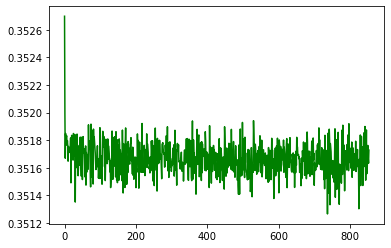

In [17]:
p = plt.figure()
plt.plot(loss_history,'g-',label='h 10,z 2')

In [18]:
"""
t1 = tep_testing_stepped(dataTest,step_size)
step_start = 0
anomalies = []
y_nomalies = []
county = 0
setNum = 0
for step in t1:
    step = to_var(torch.tensor(step,dtype=torch.float64))
    recon,_,_ = demo(step)
    anom = abs(torch.mean(step-recon))
    anom2 = torch.mean(torch.tensor(faultNumbersTest[county:county+step_size],dtype=torch.float64))
    anomalies.append(anom)
    y_nomalies.append(anom2)
    step_start = step_start + 1
    county = county + step_size
p3 = plt.figure()
plt.plot(anomalies, 'g-')
p4 = plt.figure()
plt.plot(y_nomalies, 'b-')
"""

"\nt1 = tep_testing_stepped(dataTest,step_size)\nstep_start = 0\nanomalies = []\ny_nomalies = []\ncounty = 0\nsetNum = 0\nfor step in t1:\n    step = to_var(torch.tensor(step,dtype=torch.float64))\n    recon,_,_ = demo(step)\n    anom = abs(torch.mean(step-recon))\n    anom2 = torch.mean(torch.tensor(faultNumbersTest[county:county+step_size],dtype=torch.float64))\n    anomalies.append(anom)\n    y_nomalies.append(anom2)\n    step_start = step_start + 1\n    county = county + step_size\np3 = plt.figure()\nplt.plot(anomalies, 'g-')\np4 = plt.figure()\nplt.plot(y_nomalies, 'b-')\n"

19200
////////////////////
0 : 960
1
960 : 1920
2
1920 : 2880
3
2880 : 3840
4
3840 : 4800
5
4800 : 5760
6
5760 : 6720
7
6720 : 7680
8
7680 : 8640
9
8640 : 9600
10
9600 : 10560
11
10560 : 11520
12
11520 : 12480
13
12480 : 13440
14
13440 : 14400
15
14400 : 15360
16
15360 : 16320
17
16320 : 17280
18
17280 : 18240
19
18240 : 19200
20
////////////////////
191

0.0018876136890963549
0.029126915966502628
1.3367489839623964e-05
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
191

0.012981271735807784
0.029252466587544573
0.00015829149416565942
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
----------------------------------------------------------------------------

C:\Users\Charlie\AppData\Local\Temp/ipykernel_23828/3839799652.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  p3 = plt.figure()


191

0.04009764799411925
0.03986852125176999
7.969513512930126e-06
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
191

0.024687868646246763
0.03467036100417416
2.717327152387816e-06
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
191

0.008451693607971909
0.038126752464614395
4.401048592563364e-06
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
191

0.011432839340659

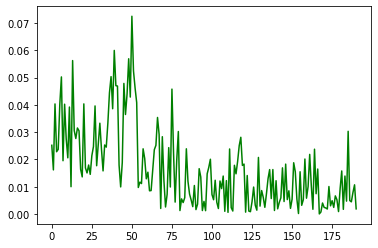

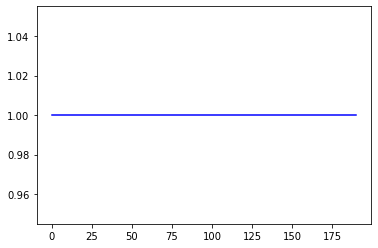

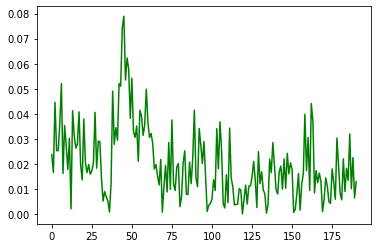

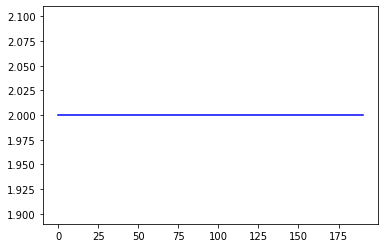

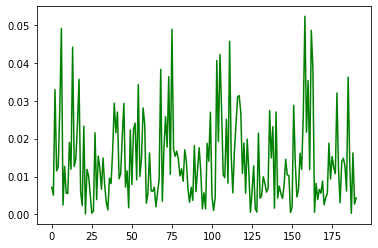

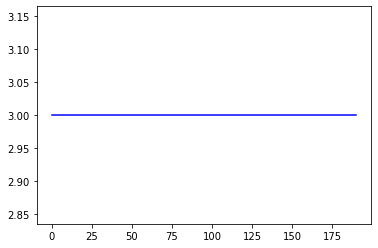

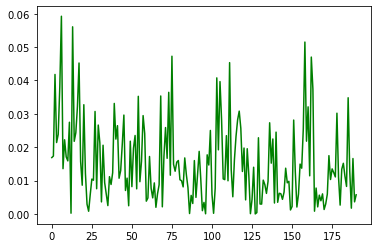

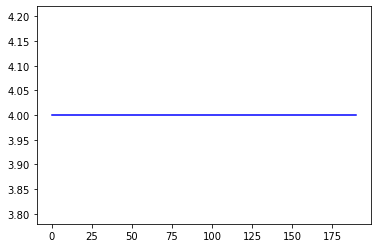

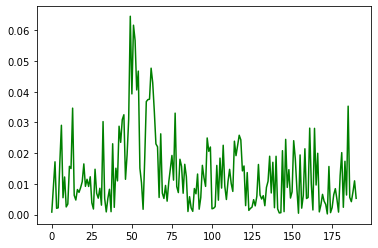

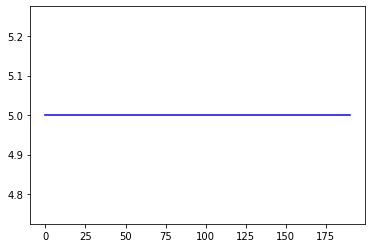

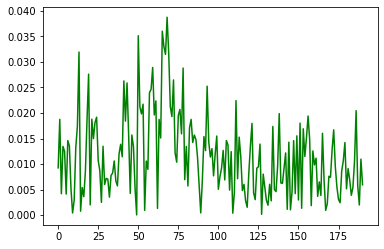

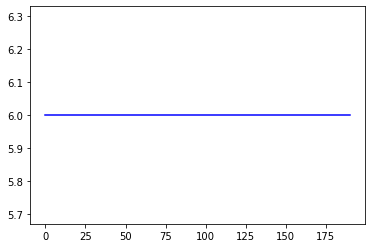

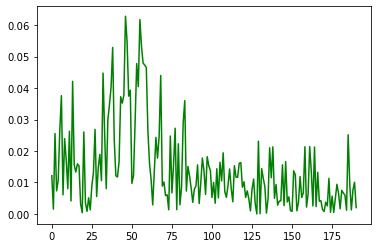

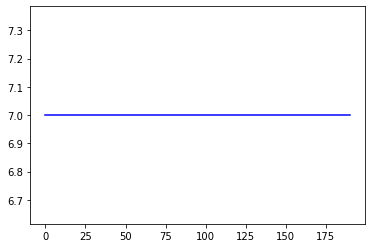

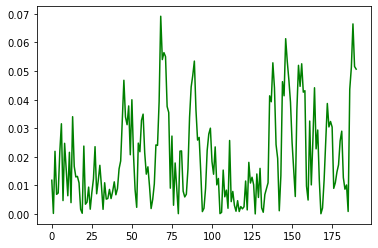

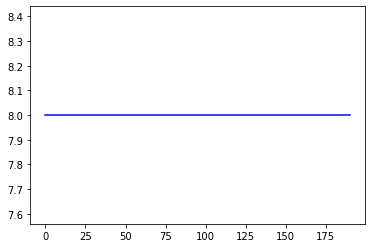

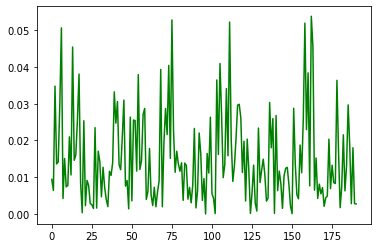

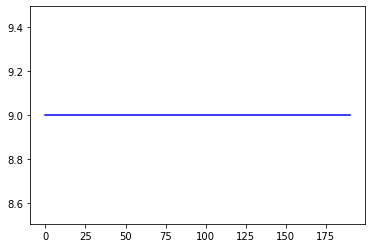

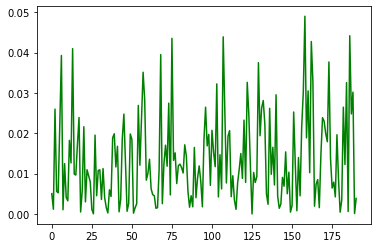

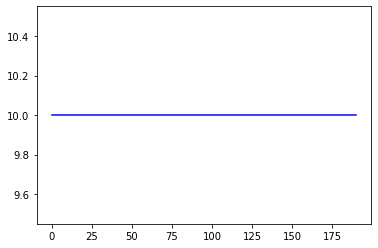

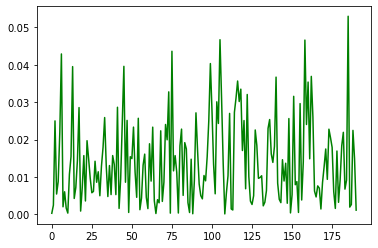

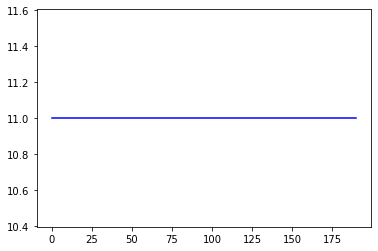

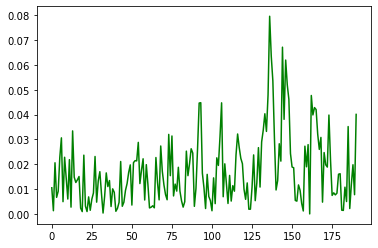

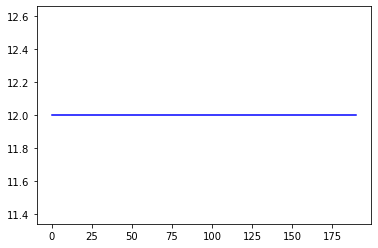

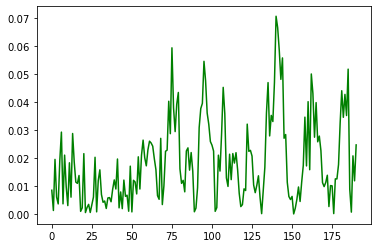

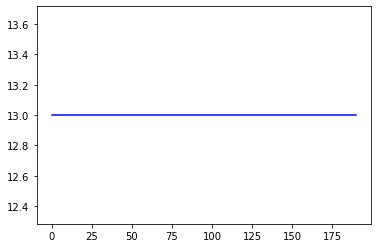

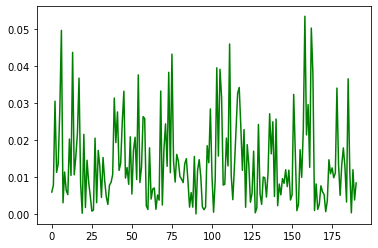

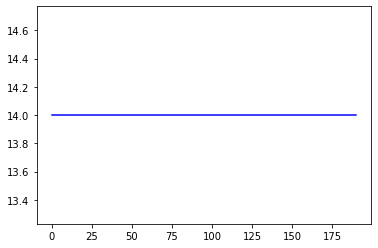

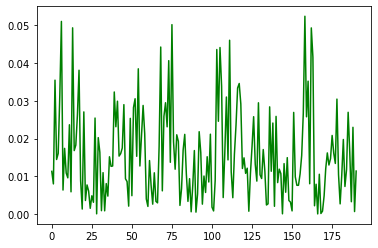

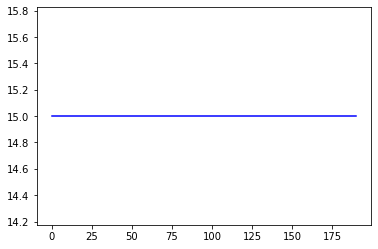

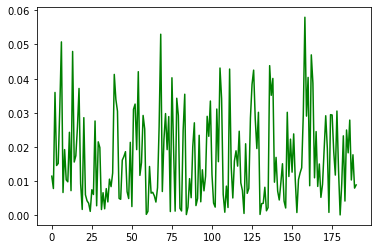

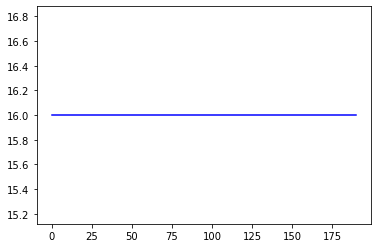

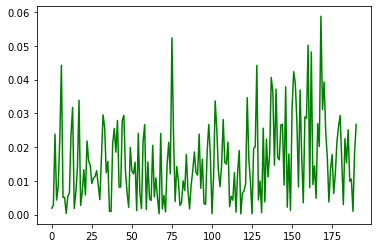

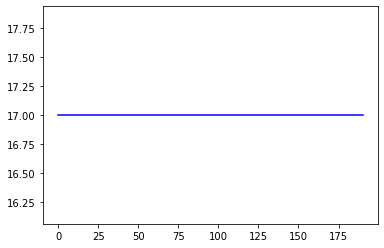

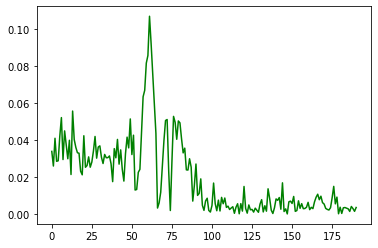

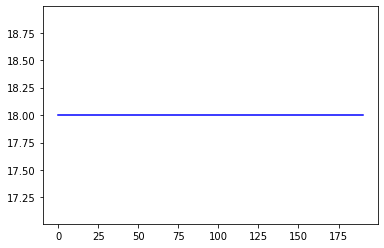

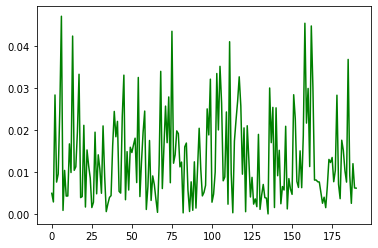

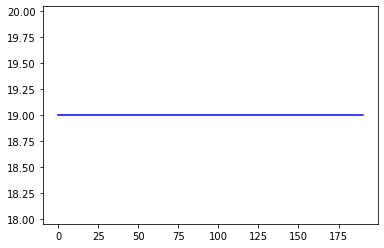

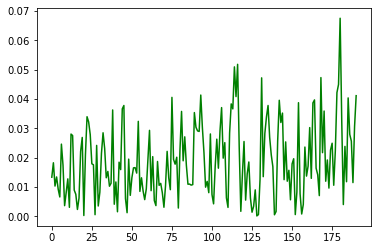

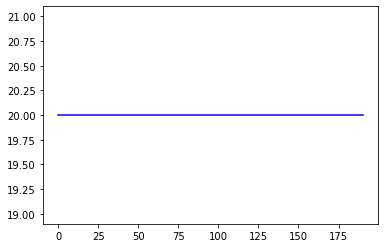

In [19]:
loc = "C:/Users/Charlie/Desktop/picsForDemo2/tepGenerated/"

strtOfTwo = int(len(dataTest)/20)
sets = []
runNum = 0 
print(len(faultNumbersTest))

print("////////////////////")
for i in range(20):
    print(str(strtOfTwo*runNum) + " : " + str((strtOfTwo*runNum)+960))
    print(faultNumbersTest[strtOfTwo*runNum])
    dt = dataTest[strtOfTwo*runNum:(strtOfTwo*runNum)+960]
    t1 = tep_testing_stepped(dt,step_size)
    sets.append(t1)
    runNum = runNum + 1
print("////////////////////")

setNum = 0
for set in sets:
    setName = "anom" + str(setNum+1) + "_G"
    fileLoc = loc + setName + ".png"
    step_start = 0
    anomalies = []
    y_nomalies = []
    county = 0
    #print(type(XX))
    #print(len(XX))
    #print(XX.shape)
    for step in set:
      step = to_var(torch.tensor(step,dtype=torch.float64))
      if True:
          #step = torch.tensor(XX[step_start:step_start+step_size])[0]
          recon,_,_ = demo(step)
          anom = abs(torch.mean(step-recon))
          anom2 = torch.mean(torch.tensor(faultNumbersTest[(setNum*strtOfTwo)+(county*step_size):(setNum*strtOfTwo)+(county*step_size+step_size)],dtype=torch.float64))
          #if county%100 == 0:
            #print("step: " + str(step))
            #print("recon: " + str(recon))
            #print(anom)
          anomalies.append(anom)
          y_nomalies.append(anom2)
          step_start = step_start + 1
          county = county + 1
    setNum = setNum + 1
    start = 0
    view = []
    max = -99999
    min = 99999
    maxA = -99999
    minA = 99999

    print(len(anomalies))

    for a in anomalies:
        if start+1 < len(anomalies):
            view.append(abs(anomalies[start+1].item() - a.item()))  
            start = start + 1

    for i in range(len(view)):
        j = i + 1
        if view[i] > max:
            max = a.item()
        if view[i] < min:
            min = a.item()
        if i < len(view)-1:
            #print("i: " + str(view[i]))
            #print("j: " + str(view[j]))
            v = abs(view[i]-view[j])
            #print("v: " + str(v))
            if v > maxA:
                maxA = v
            if v < minA:
                minA = v

    print()
    print(max)
    print(maxA)
    print(minA)

    #could get loc min and max given a step size rather than literally between individual points

    p3 = plt.figure()
    plt.plot(anomalies, 'g-')
    plt.savefig(fileLoc)
    p4 = plt.figure()
    plt.plot(y_nomalies, 'b-')
    print("-------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------")